## DETECCIÓN DE FRAUDE EN TARJETAS DE CRÉDITO DE UN BANCO PARTICULAR UTILIZANDO MÉTODOS DE CLUSTERING

### Mestrante: Luis Angel Vargas Quispe

#### Ubicacion del dataset: https://www.kaggle.com/code/mohaiminul101/credit-card-fraud-detection-random-forest/input

In [ ]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

# Cargar el conjunto de datos con optimizaciones
file_path = '/Users/luisvargas/Documents/Maestria Inteligencia Artificial/MODULO4 - BUSINESS INTELLIGENT Y MINERIA DE DATOS/Monografia Analisis de datos y business intelligence/creditcard.csv'

# Lee el CSV especificando parámetros de optimización (por ejemplo, la conversión de fechas si es necesario)
fraud_df = pd.read_csv(file_path)

# Verificar información general sobre el dataframe (tipos de datos, valores nulos, etc.)
print(fraud_df.info())

# Revisar las primeras filas del dataframe para tener una idea de cómo es la estructura de los datos
print(fraud_df.head())

# Opcional: Descripción estadística de las variables numéricas
print(fraud_df.describe())



fraud_df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [ ]:
# Descripcion de contenido del dataset
fraud_df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [ ]:
# Tipo de dato que contiene el Dataset
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Hacemos un análisis del balance de los datos. Vemos que el desbalanceo es muy grande y no hay mucho con lo que podamos operar.

In [28]:
# Crear el histograma con Plotly Express
fig = px.histogram(
    fraud_df, 
    x='Class', 
    color='Class', 
    color_discrete_sequence=px.colors.qualitative.Set2,  # Colores para 'Class'
    title='Distribución de la Clase en el Conjunto de Datos'
)

# Personalización del gráfico
fig.update_layout(
    height=600,   # Ajusta la altura del gráfico
    width=1000,   # Ajusta el ancho del gráfico
    title_text="Distribución de Clases del Conjunto de Datos",  # Título más descriptivo
    title_x=0.5,  # Centrar el título
    xaxis_title="Clase (0 = No Fraude, 1 = Fraude)",  # Etiqueta del eje X
    yaxis_title="Número de Ejemplos",  # Etiqueta del eje Y
)

# Configuración de los ejes
fig.update_yaxes(
    showticklabels=True,  # Muestra las etiquetas del eje Y
    title_standoff=10     # Espacio entre el eje Y y las etiquetas
)

# Cambiar el estilo del gráfico
fig.layout.template = 'ggplot2'  # Estilo ggplot2 (similar a R)
fig.update_traces(marker=dict(line=dict(width=0)))  # Eliminar bordes de las barras (opcional)

# Mostrar el gráfico
fig.show()

In [12]:

corr_matrix = fraud_df.corr()
fig = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=list(corr_matrix.columns),
    y=list(corr_matrix.index),
    annotation_text=np.around(corr_matrix.values, decimals=2),
    colorscale='Reds',
    showscale=True
)
fig.update_layout(
    height=1500,
    width=1500,
    title_text="Matriz de correlación",
    template='ggplot2'
)
fig.show()

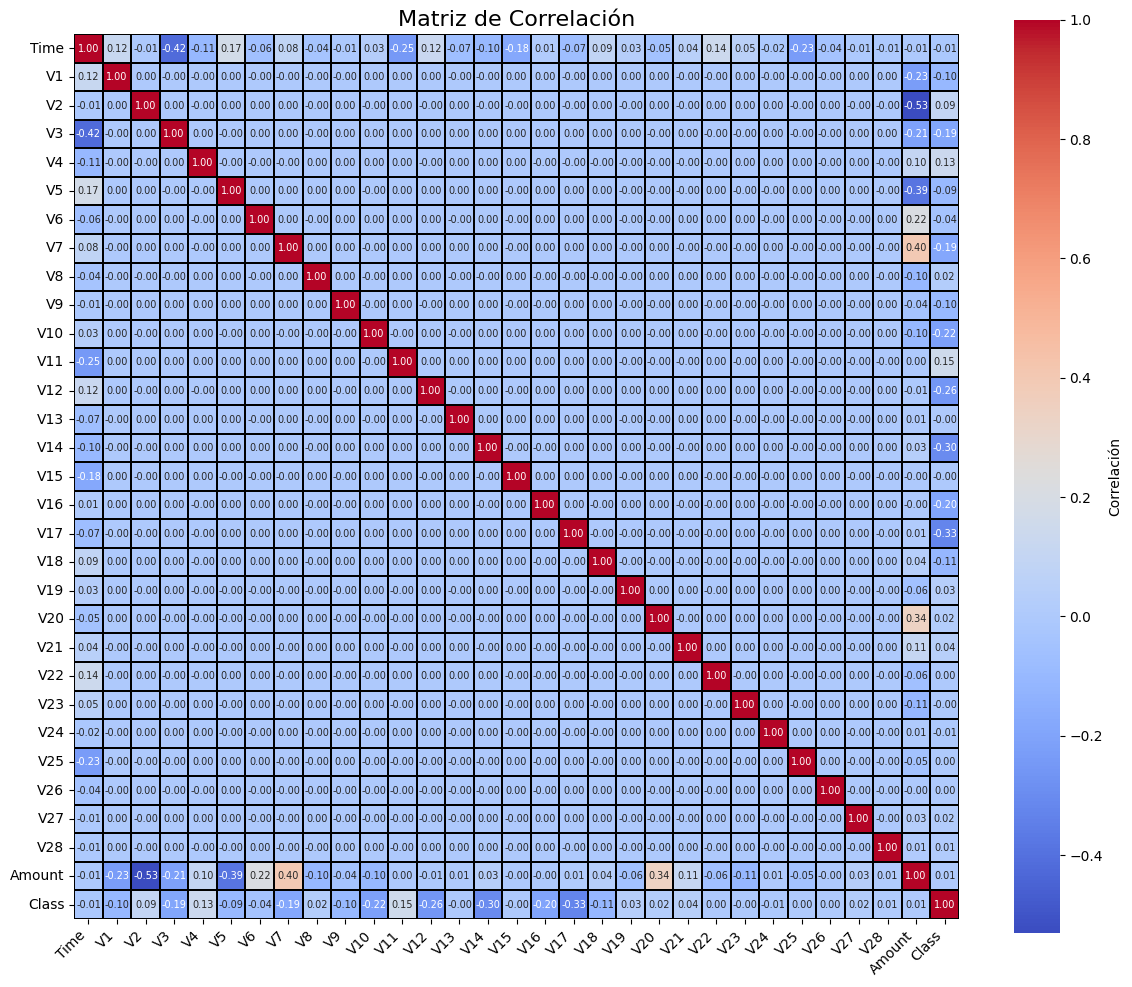

In [34]:
# Calcular la matriz de correlación
corr_matrix = fraud_df.corr()

# Crear el mapa de calor usando Seaborn para mayor control
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix, 
    annot=True,  # Mostrar los valores de correlación
    cmap='coolwarm',  # Usar un mapa de colores adecuado
    linewidths=0.1,  # Agregar líneas entre las celdas
    linecolor='black',  # Color de las líneas
    fmt=".2f",  # Formato de los valores (2 decimales)
    cbar_kws={'label': 'Correlación'},  # Etiqueta de la barra de color
    annot_kws={"size": 7, 'ha': 'center', 'va': 'center'},  # Ajustar tamaño y alineación de los textos
    square=True,  # Cuadrado para mejor visualización
    xticklabels=corr_matrix.columns,  # Etiquetas del eje X
    yticklabels=corr_matrix.index  # Etiquetas del eje Y
)

# Personalizar la visualización
plt.title('Matriz de Correlación', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje X
plt.yticks(rotation=0)  # Mantener las etiquetas del eje Y horizontales

# Mostrar el gráfico
plt.tight_layout()  # Ajustar los márgenes automáticamente
plt.show()


In [38]:
# Seleccionar las columnas que queremos analizar
selected_columns = ['V1', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'Class']

# Calcular la matriz de correlación de las columnas seleccionadas
corr_matrix_selected = fraud_df[selected_columns].corr()

# Crear el mapa de calor con Plotly
fig = ff.create_annotated_heatmap(
    z=corr_matrix_selected.values,  # Valores de la matriz de correlación
    x=list(corr_matrix_selected.columns),  # Nombres de las columnas en el eje X
    y=list(corr_matrix_selected.index),  # Nombres de las filas en el eje Y
    annotation_text=np.around(corr_matrix_selected.values, decimals=2),  # Anotaciones con los valores
    showscale=True,  # Mostrar la escala de colores
    colorscale='RdBu',  # Cambiar el esquema de colores a 'RdBu' (rojo-azul) para mejorar la claridad
)

# Personalización del gráfico
fig.update_layout(
    height=800,   # Ajustar la altura del gráfico
    width=800,    # Ajustar la anchura del gráfico
    title_text="Matriz de Correlación (Variables Seleccionadas)",  # Título más descriptivo
    title_x=0.5,  # Centrar el título
    template='ggplot2',  # Usar estilo ggplot2 para una visualización más limpia
    margin=dict(t=100, b=100, l=50, r=50)  # Ajustar márgenes para mejorar la presentación
)

# Mejorar la legibilidad de las etiquetas de los ejes
#fig.update_xaxes(tickangle=45, tickmode='array', title='Variables')  # Rotar las etiquetas del eje X
#fig.update_yaxes(tickangle=0, title='Variables')  # Mantener las etiquetas del eje Y horizontales

# Mostrar el gráfico
fig.show()


Podemos ahora seleccionar las características que resultan importantes. Al desconocer de qué se tratan estos predictores y al haber ya sido previamente procesados, es difícil aplicar más ingeniería de características.

Veamos sus distribuciones:

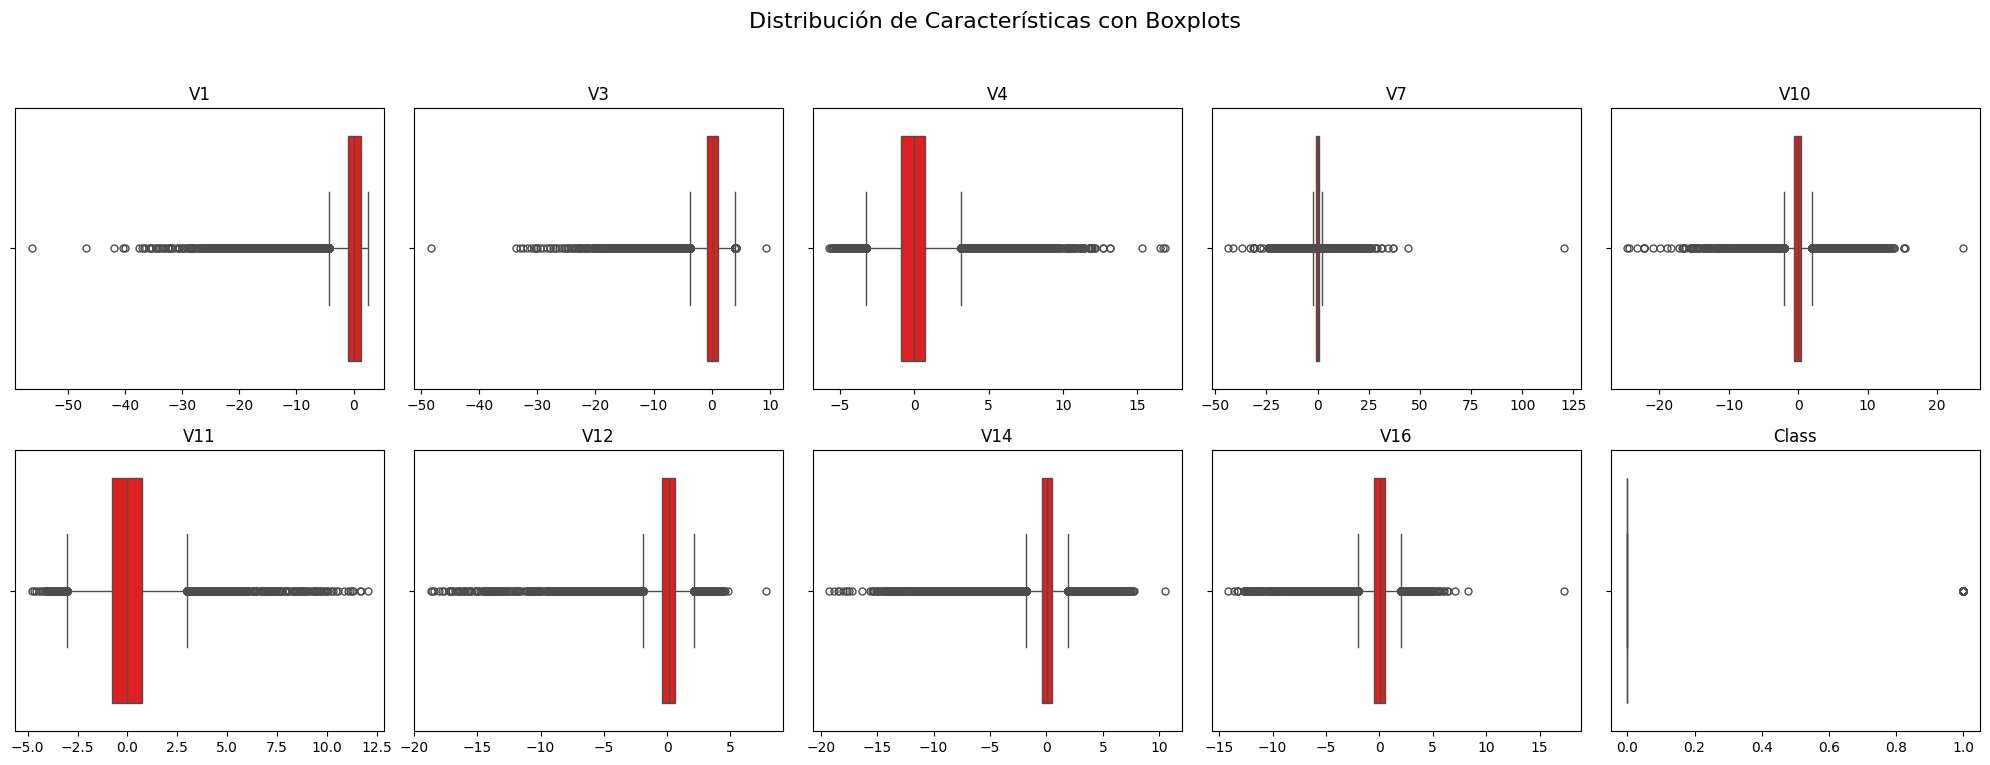

In [40]:
# Lista de características seleccionadas para los boxplots
features_to_plot = selected_columns
n_cols = 5  # Número de columnas en el gráfico
n_rows = (len(features_to_plot) + n_cols - 1) // n_cols  # Calcular el número de filas necesarias

# Crear los subgráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))

# Ajuste del título global
fig.suptitle('Distribución de Características con Boxplots', fontsize=16)

# Iterar sobre las características y plotear los boxplots
for i, feature in enumerate(features_to_plot):
    row = i // n_cols  # Fila correspondiente
    col = i % n_cols   # Columna correspondiente
    sns.boxplot(x=fraud_df[feature], ax=axes[row, col], color='red', fliersize=5)
    axes[row, col].set_title(f'{feature}', fontsize=12)  # Título de cada subgráfico
    axes[row, col].set_xlabel('')  # Eliminar etiquetas en el eje X (si no es necesario)
    axes[row, col].set_ylabel('')  # Eliminar etiquetas en el eje Y (si no es necesario)

# Eliminar ejes vacíos si hay espacios no utilizados
for i in range(len(features_to_plot), n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    axes[row, col].axis('off')  # Desactivar los ejes vacíos

# Mejorar el espaciado entre los gráficos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajuste del layout para que no se superponga el título

# Mostrar los gráficos
plt.show()


Los outliers acá son un caso particular. Dado que nos encontramos ante un caso donde la certeza de predecir la clase minoritaria es crítica, tenemos que asegurarnos que esos outliers no sean información importante sobre la clase minoritaria.

In [15]:
def remove_outliers_iqr(df, columns):
    # Crear una copia del DataFrame para evitar modificar el original
    df_cleaned = df.copy()
    
    # Iterar sobre las columnas seleccionadas
    for column in columns:
        # Calcular el primer y tercer cuartil (Q1, Q3)
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calcular los límites inferior y superior
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filtrar los valores fuera del rango (outliers)
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

# Usar la función para limpiar los outliers en las columnas seleccionadas
fraud_df_cleaned = remove_outliers_iqr(fraud_df, selected_columns)

In [16]:
print("Balance del dataset original:")
print(fraud_df['Class'].value_counts())

print("\nBalance del dataset luego de limpiar outliers:")
print(fraud_df_cleaned['Class'].value_counts())

Balance del dataset original:
Class
0    284315
1       492
Name: count, dtype: int64

Balance del dataset luego de limpiar outliers:
Class
0    224921
Name: count, dtype: int64


Balance del Dataset Original:

Distribución de clases en el dataset original:
Class
0    284315
1       492
Name: count, dtype: int64

Porcentaje de clases en el dataset original:
Class
0    99.83
1     0.17
Name: proportion, dtype: float64%

Balance del Dataset Después de Limpiar Outliers:

Distribución de clases en el dataset limpio:
Class
0    224921
Name: count, dtype: int64

Porcentaje de clases en el dataset limpio:
Class
0    100.0
Name: proportion, dtype: float64%



/var/folders/hj/bmzlg64d73s_lg39tbgcwl700000gn/T/ipykernel_2642/3711625092.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Número de observaciones')

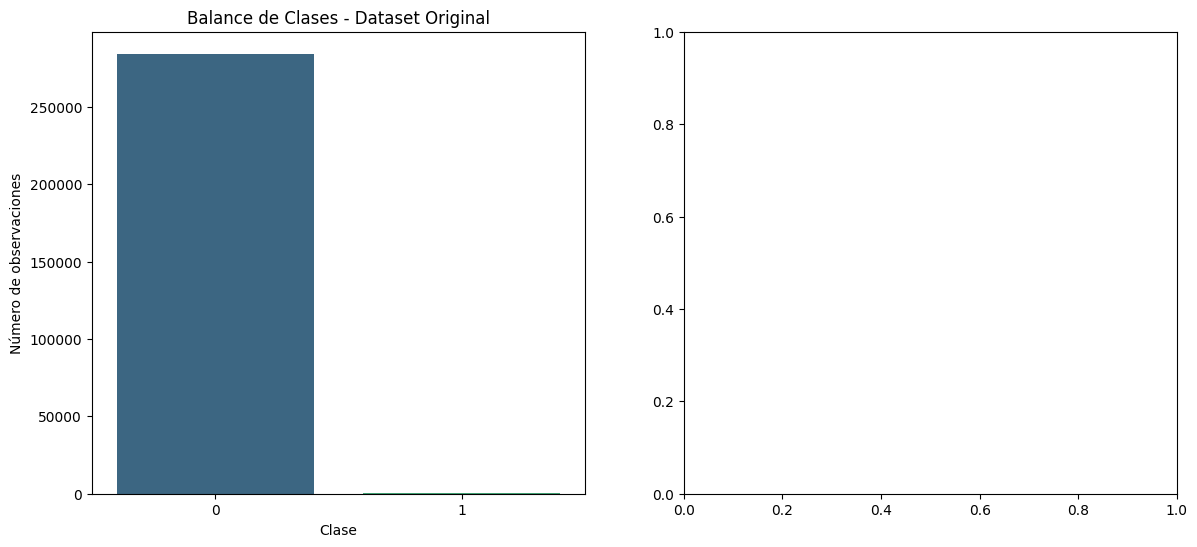

In [41]:
# Imprimir balance del dataset original
print("Balance del Dataset Original:")
original_balance = fraud_df['Class'].value_counts()
original_percentage = fraud_df['Class'].value_counts(normalize=True) * 100
print(f"\nDistribución de clases en el dataset original:\n{original_balance}")
print(f"\nPorcentaje de clases en el dataset original:\n{original_percentage.round(2)}%\n")

# Imprimir balance del dataset después de limpiar outliers
print("Balance del Dataset Después de Limpiar Outliers:")
cleaned_balance = fraud_df_cleaned['Class'].value_counts()
cleaned_percentage = fraud_df_cleaned['Class'].value_counts(normalize=True) * 100
print(f"\nDistribución de clases en el dataset limpio:\n{cleaned_balance}")
print(f"\nPorcentaje de clases en el dataset limpio:\n{cleaned_percentage.round(2)}%\n")

# Visualización del balance de clases en el dataset original y limpio
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de barras del balance original
sns.barplot(x=original_balance.index, y=original_balance.values, ax=axes[0], palette="viridis")
axes[0].set_title('Balance de Clases - Dataset Original')
axes[0].set_xlabel('Clase')
axes[0].set_ylabel('Número de observaciones')

# Gráfico de barras del balance limpi


Vemos que, haciendo un recorte de los outliers, nos llevamos también todo el conjunto de datos de operaciones fraudulentas. Entonces probemos aplicando esto solo al conjunto de operaciones válidas:

In [43]:
def remove_outliers_iqr_class_0(df, selected_columns):
    """
    Elimina los outliers utilizando el IQR, pero solo en las observaciones de Clase 0 (no fraude).
    
    Parámetros:
    df (pd.DataFrame): DataFrame original.
    selected_columns (list): Lista de columnas sobre las cuales calcular los outliers.
    
    Devuelve:
    pd.DataFrame: DataFrame sin los outliers para las observaciones de Clase 0.
    """
    # Crear una copia del DataFrame para evitar modificar el original
    df_cleaned = df.copy()

    for column in selected_columns:
        if column != 'Class':  # Asegurarse de no procesar la columna 'Class'
            # Filtrar los datos de Clase 0 para calcular los cuartiles (Q1 y Q3)
            class_0_data = df_cleaned[df_cleaned['Class'] == 0][column]
            
            # Calcular los cuartiles y el IQR
            Q1 = class_0_data.quantile(0.25)
            Q3 = class_0_data.quantile(0.75)
            IQR = Q3 - Q1
            
            # Calcular los límites superior e inferior
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Filtrar las filas fuera de los límites para Clase 0, pero dejar Clase 1 sin cambios
            df_cleaned = df_cleaned[((df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)) | (df_cleaned['Class'] == 1)]
    
    return df_cleaned

# Usar la función para limpiar los outliers en el DataFrame
fraud_df_cleaned2 = remove_outliers_iqr_class_0(fraud_df, selected_columns)

# Verificar los primeros registros del DataFrame limpio
fraud_df_cleaned2.head()


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
5  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427 -0.232794   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  
5  0.105915  0.253844  0.081080    3.67      0  

[5 rows x 31 columns]

In [18]:
print("Balance del dataset original:")
print(fraud_df['Class'].value_counts())

print("\nBalance del dataset luego de limpiar outliers:")
print(fraud_df_cleaned2['Class'].value_counts())

Balance del dataset original:
Class
0    284315
1       492
Name: count, dtype: int64

Balance del dataset luego de limpiar outliers:
Class
0    224882
1       492
Name: count, dtype: int64


Balance del Dataset Original:

Distribución de clases en el dataset original:
Class
0    284315
1       492
Name: count, dtype: int64

Porcentaje de clases en el dataset original:
Class
0    99.83
1     0.17
Name: proportion, dtype: float64%

Balance del Dataset Después de Limpiar Outliers:

Distribución de clases en el dataset limpio:
Class
0    224882
1       492
Name: count, dtype: int64

Porcentaje de clases en el dataset limpio:
Class
0    99.78
1     0.22
Name: proportion, dtype: float64%



/var/folders/hj/bmzlg64d73s_lg39tbgcwl700000gn/T/ipykernel_2642/1057112298.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/hj/bmzlg64d73s_lg39tbgcwl700000gn/T/ipykernel_2642/1057112298.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




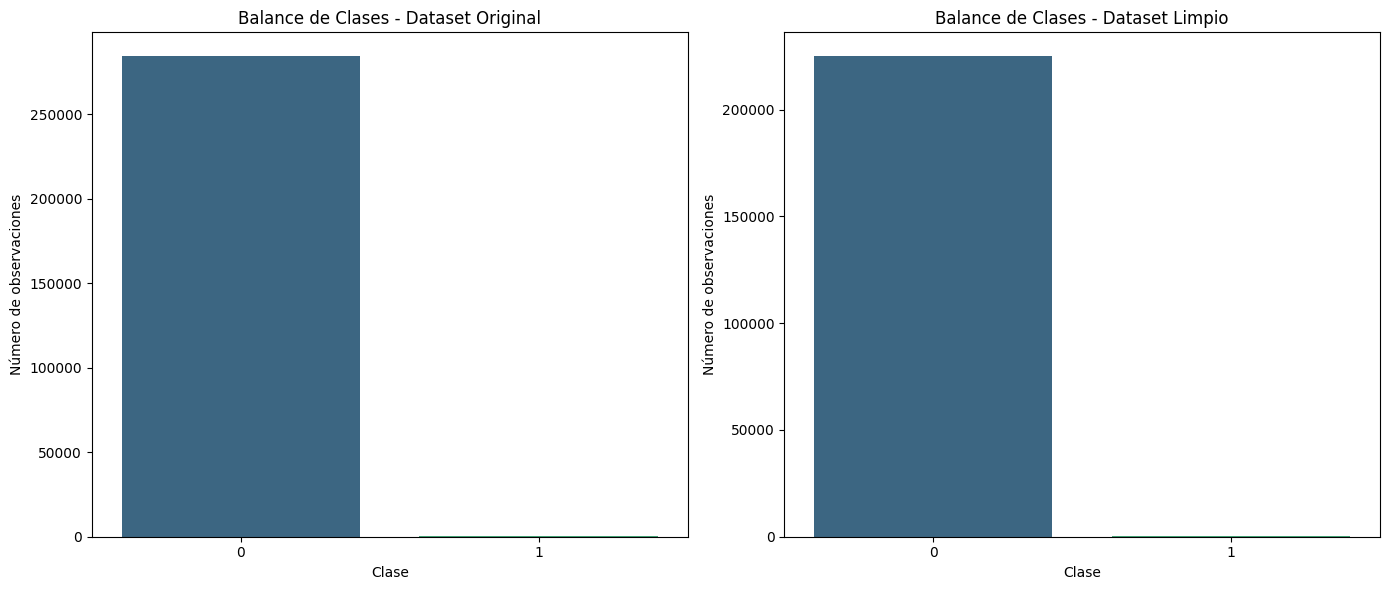

In [44]:
# Imprimir balance del dataset original con frecuencias y porcentajes
print("Balance del Dataset Original:")
original_balance = fraud_df['Class'].value_counts()
original_percentage = fraud_df['Class'].value_counts(normalize=True) * 100
print(f"\nDistribución de clases en el dataset original:\n{original_balance}")
print(f"\nPorcentaje de clases en el dataset original:\n{original_percentage.round(2)}%\n")

# Imprimir balance del dataset después de limpiar outliers con frecuencias y porcentajes
print("Balance del Dataset Después de Limpiar Outliers:")
cleaned_balance = fraud_df_cleaned2['Class'].value_counts()
cleaned_percentage = fraud_df_cleaned2['Class'].value_counts(normalize=True) * 100
print(f"\nDistribución de clases en el dataset limpio:\n{cleaned_balance}")
print(f"\nPorcentaje de clases en el dataset limpio:\n{cleaned_percentage.round(2)}%\n")

# Visualización del balance de clases en el dataset original y limpio
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de barras del balance original
sns.barplot(x=original_balance.index, y=original_balance.values, ax=axes[0], palette="viridis")
axes[0].set_title('Balance de Clases - Dataset Original')
axes[0].set_xlabel('Clase')
axes[0].set_ylabel('Número de observaciones')

# Gráfico de barras del balance limpio
sns.barplot(x=cleaned_balance.index, y=cleaned_balance.values, ax=axes[1], palette="viridis")
axes[1].set_title('Balance de Clases - Dataset Limpio')
axes[1].set_xlabel('Clase')
axes[1].set_ylabel('Número de observaciones')

# Ajustar layout y mostrar los gráficos
plt.tight_layout()
plt.show()


La importancia de Time
Aunque no haya una correlación lineal con la variable objetivo y time, no quiere decir que no existan otro tipo de relaciones que igual importen o sirvan para aplicar en el modelo predictivo.

Se probó en el modelo elegido el entrenamiento con y sin time, y con time mejora notablemente. Esto nos quiere decir que Time importa información valiosa respecto a Class. Veamos entonces qué tan diferente se comporta la distribución de Time respecto a Class:

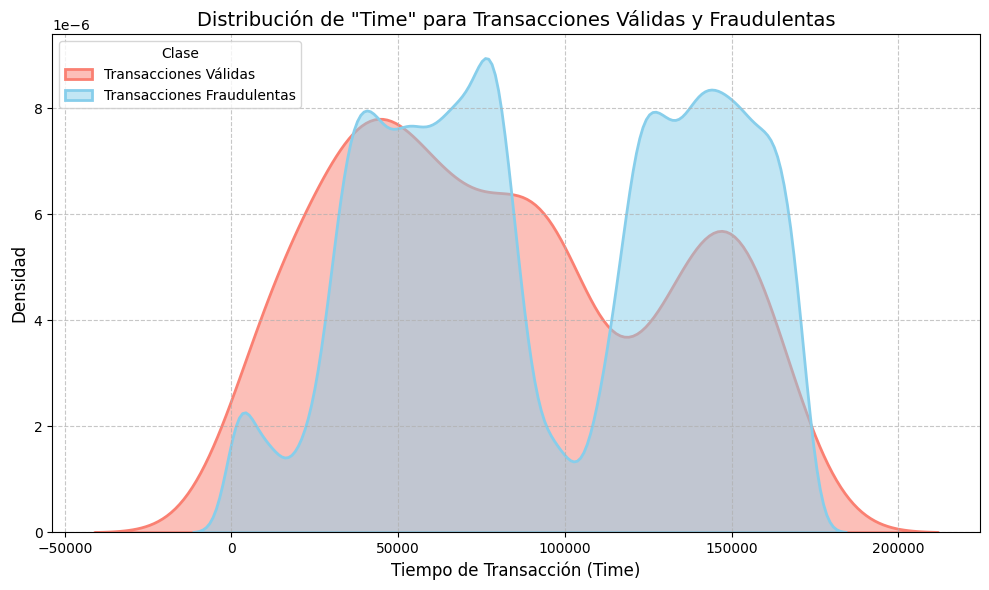

In [45]:
# Mejorar la visualización con KDE (Kernel Density Estimation)
plt.figure(figsize=(10, 6))

# Usamos seaborn para crear un gráfico de densidad KDE con diferentes colores para las clases
sns.kdeplot(data=fraud_df, x='Time', hue='Class', fill=True, common_norm=False, 
            palette={0: 'skyblue', 1: 'salmon'}, alpha=0.5, linewidth=2)

# Mejorar el formato del gráfico
plt.xlabel('Tiempo de Transacción (Time)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.title('Distribución de "Time" para Transacciones Válidas y Fraudulentas', fontsize=14)
plt.legend(title='Clase', labels=['Transacciones Válidas', 'Transacciones Fraudulentas'])
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


## Selección y transformación de características:
Realizamos la selección de características. No es necesario escalar, dado que ya estaban previamente escaladas

In [46]:
# Selección de las características a utilizar, incluyendo la variable objetivo 'Class'
selected_features = [ 
    'V1', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'Time', 'Class'
]

# Verificar que todas las columnas seleccionadas existen en el DataFrame
missing_columns = [col for col in selected_features if col not in fraud_df_cleaned2.columns]
if missing_columns:
    print(f"Advertencia: Las siguientes columnas no se encuentran en el DataFrame: {missing_columns}")
else:
    print("Todas las columnas seleccionadas están presentes en el DataFrame.")

# Seleccionar solo las columnas especificadas
fraud_df_selected = fraud_df_cleaned2[selected_features]

# Separar las variables predictoras (X) de la variable objetivo (y)
X = fraud_df_selected.drop('Class', axis=1)  # Eliminar la columna 'Class' para X
y = fraud_df_selected['Class']  # Variable objetivo

# Mostrar el tamaño de X e y para verificar que la separación es correcta
print(f"Tamaño de X (variables predictoras): {X.shape}")
print(f"Tamaño de y (variable objetivo): {y.shape}")


Todas las columnas seleccionadas están presentes en el DataFrame.
Tamaño de X (variables predictoras): (225374, 12)
Tamaño de y (variable objetivo): (225374,)


## Reducción de dimensionalidad (sin balancear)

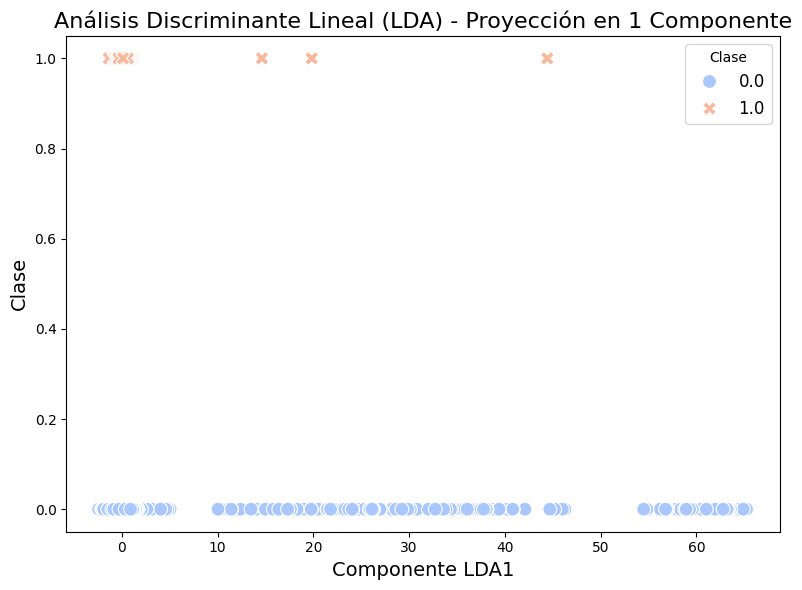

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Realizar LDA con 1 componente
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

# Crear un DataFrame con los resultados de LDA
fraud_df_lda = pd.DataFrame(X_lda, columns=['LDA1'])
fraud_df_lda['Class'] = y

# Configuración del gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LDA1', y='Class', data=fraud_df_lda, hue='Class', palette='coolwarm', style='Class', markers=['o', 'X'], s=100)

# Ajustes de título y etiquetas
plt.title('Análisis Discriminante Lineal (LDA) - Proyección en 1 Componente', fontsize=16)
plt.xlabel('Componente LDA1', fontsize=14)
plt.ylabel('Clase', fontsize=14)

# Mejorar la leyenda y la visualización
plt.legend(title='Clase', loc='upper right', fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [48]:
# Contar las frecuencias de cada clase en 'y'
class_counts = y.value_counts()

# Contar las frecuencias y calcular el porcentaje de cada clase
class_percentage = y.value_counts(normalize=True) * 100

# Mostrar las frecuencias y los porcentajes
print("Frecuencia de las clases:")
print(class_counts)

print("\nPorcentaje de las clases:")
print(class_percentage.round(2))


Frecuencia de las clases:
Class
0    224882
1       492
Name: count, dtype: int64

Porcentaje de las clases:
Class
0    99.78
1     0.22
Name: proportion, dtype: float64


Accuracy: 0.9996672212978369
Precision: 0.9885057471264368
Recall: 0.86
F1-score: 0.9197860962566845


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



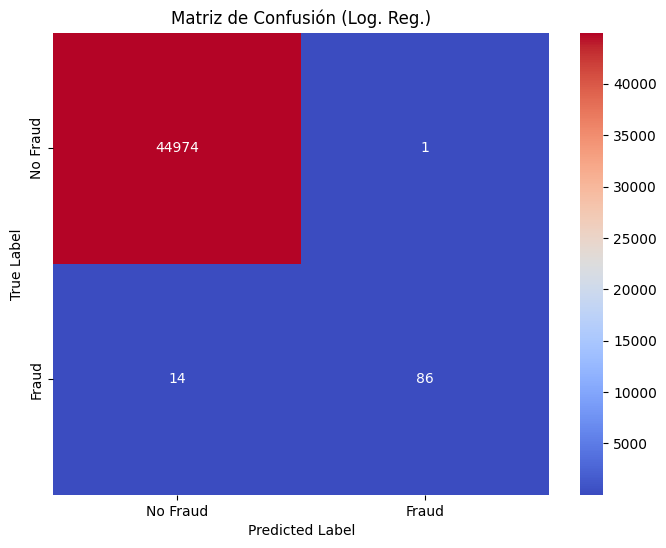

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión (Log. Reg.)')
plt.show()

In [52]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

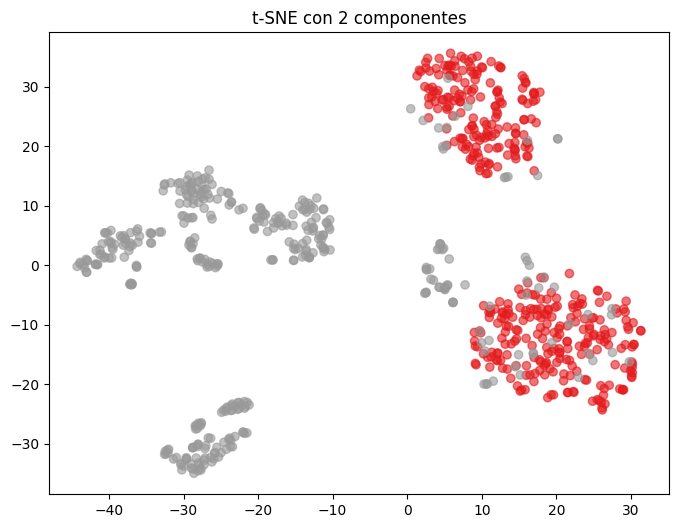

In [56]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled.values)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_scaled)

fraud_df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
fraud_df_tsne['Class'] = y_train_resampled

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train_resampled, cmap='Set1', alpha=0.6)
plt.title('t-SNE con 2 componentes')
plt.show()

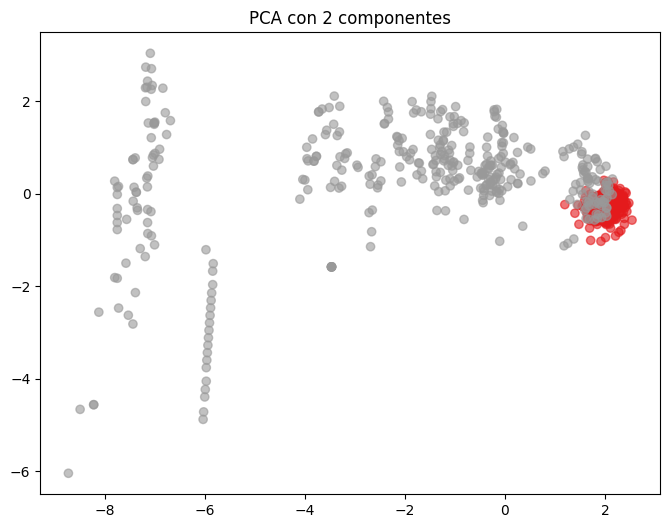

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

fraud_df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
fraud_df_pca['Class'] = y_train_resampled

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_resampled, cmap='Set1', alpha=0.6)
plt.title('PCA con 2 componentes')
plt.show()

Accuracy: 0.4500
Precision: 0.0026
Recall: 0.6500
F1-score: 0.0052


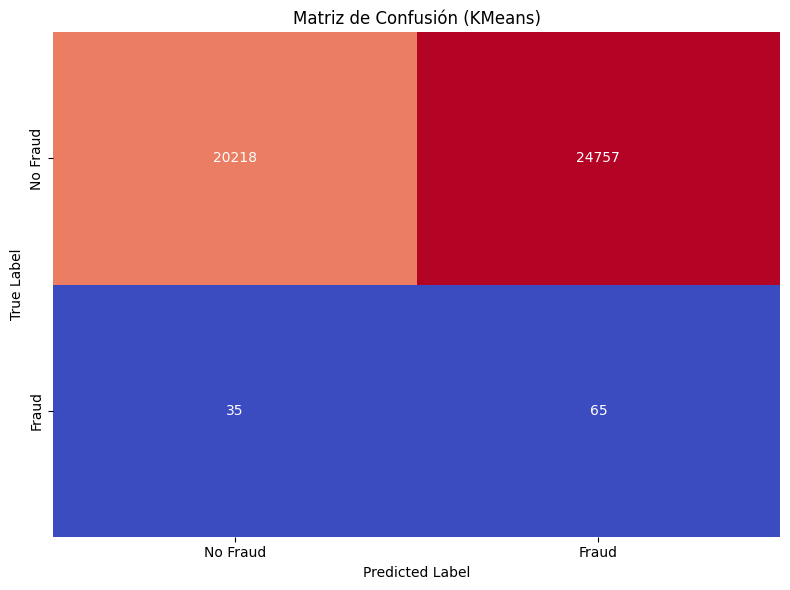

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Inicializar el modelo de KMeans con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_resampled)

# Realizar las predicciones en el conjunto de prueba
y_pred_kmeans = kmeans.predict(X_test)

# Asignar las etiquetas de KMeans a las clases de fraude (1) y no fraude (0)
# Usamos las clases verdaderas para mapear correctamente las etiquetas de los clusters.
# Primero verificamos a cuál clase corresponde cada cluster.

# Identificar qué cluster corresponde a la clase 1 (fraud)
fraud_cluster = np.argmax(np.bincount(y_pred_kmeans[y_test == 1]))

# Mapear las etiquetas de los clusters a las clases 0 y 1
y_pred_kmeans_mapped = [1 if label == fraud_cluster else 0 for label in y_pred_kmeans]

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_kmeans_mapped)
precision = precision_score(y_test, y_pred_kmeans_mapped)
recall = recall_score(y_test, y_pred_kmeans_mapped)
f1 = f1_score(y_test, y_pred_kmeans_mapped)

# Imprimir las métricas
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Calcular la matriz de confusión
confusion_mat_kmeans = confusion_matrix(y_test, y_pred_kmeans_mapped)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_kmeans, annot=True, fmt='d', cmap='coolwarm', 
            xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'], cbar=False)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión (KMeans)')
plt.tight_layout()
plt.show()
